In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

**Disclaimer 1** : Some text below is some note for myself since I just started learning basic machine learning by my own some are from Youtube course some from AI help and some from StackOverflow etc.
Source I learn from : [FreecodeCamp](https://youtu.be/i_LwzRVP7bg?si=1P-06dqk5WAu1Hb8
)

**Disclaimer 2** : I try a similar code learn from the source but try with other datasets and try change code to be able to work with this iris datasets such as label encoding since the target has 3 classes.
Data Set source: https://archive.ics.uci.edu/dataset/53/iris

**Disclaimer 3** : This is for my university portfolio.


In [3]:
cols = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df = pd.read_csv('iris.data', names=cols)
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the 'class' column
df['class'] = le.fit_transform(df['class'])

# If you want to see the mapping
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(class_mapping)
df['class'].unique()

{'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


array([0, 1, 2])

Label Encoding: Assigns a single unique integer to each category. For example, if you had categories 'A', 'B', and 'C', Label Encoding might assign 0 to 'A', 1 to 'B', and 2 to 'C'. This is what the code snippet you provided does.

One-Hot Encoding: Creates a new binary column for each category. For example, if you had categories 'A', 'B', and 'C', One-Hot Encoding would create three new columns: 'Category_A', 'Category_B', and 'Category_C'. For a data point that was originally 'A', the 'Category_A' column would have a value of 1, and the other two would be 0. This approach is generally preferred for nominal (unordered) categorical data in machine learning to avoid implying an artificial ordinal relationship between categories that Label Encoding can create.

In [6]:
df['class']

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


**frac=1** means it samples 100% of the data, effectively randomizing the order of the rows. Shuffling is important to ensure that the training, validation, and testing sets are representative of the overall dataset and not biased by the original order of the data.

**np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])**
60% for training, 20% for validation, and 20% for testing


In [8]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

```scale_dataset``` which is designed to preprocess a Pandas DataFrame for machine learning tasks. The function takes a DataFrame as input and optionally applies oversampling.






```RandomOverSampler()``` is a technique used in machine learning, specifically when dealing with datasets where one class has significantly fewer examples than the other(s). This situation is called class imbalance.

Imagine you have a dataset where you're trying to predict if an email is spam or not. You might have 900 non-spam emails and only 100 spam emails. If you train a model on this imbalanced data, it might become very good at identifying non-spam emails but struggle to correctly identify spam emails because it hasn't seen many examples of them.


In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid)
test, X_test, y_test = scale_dataset(test)

valid (validation) and test datasets typically do not require oversampling, even if the training data is oversampled, is to ensure that you are evaluating your model's performance on a dataset that reflects the real-world distribution of your data.

#K-Nearest-Neighbour (KNN)#




###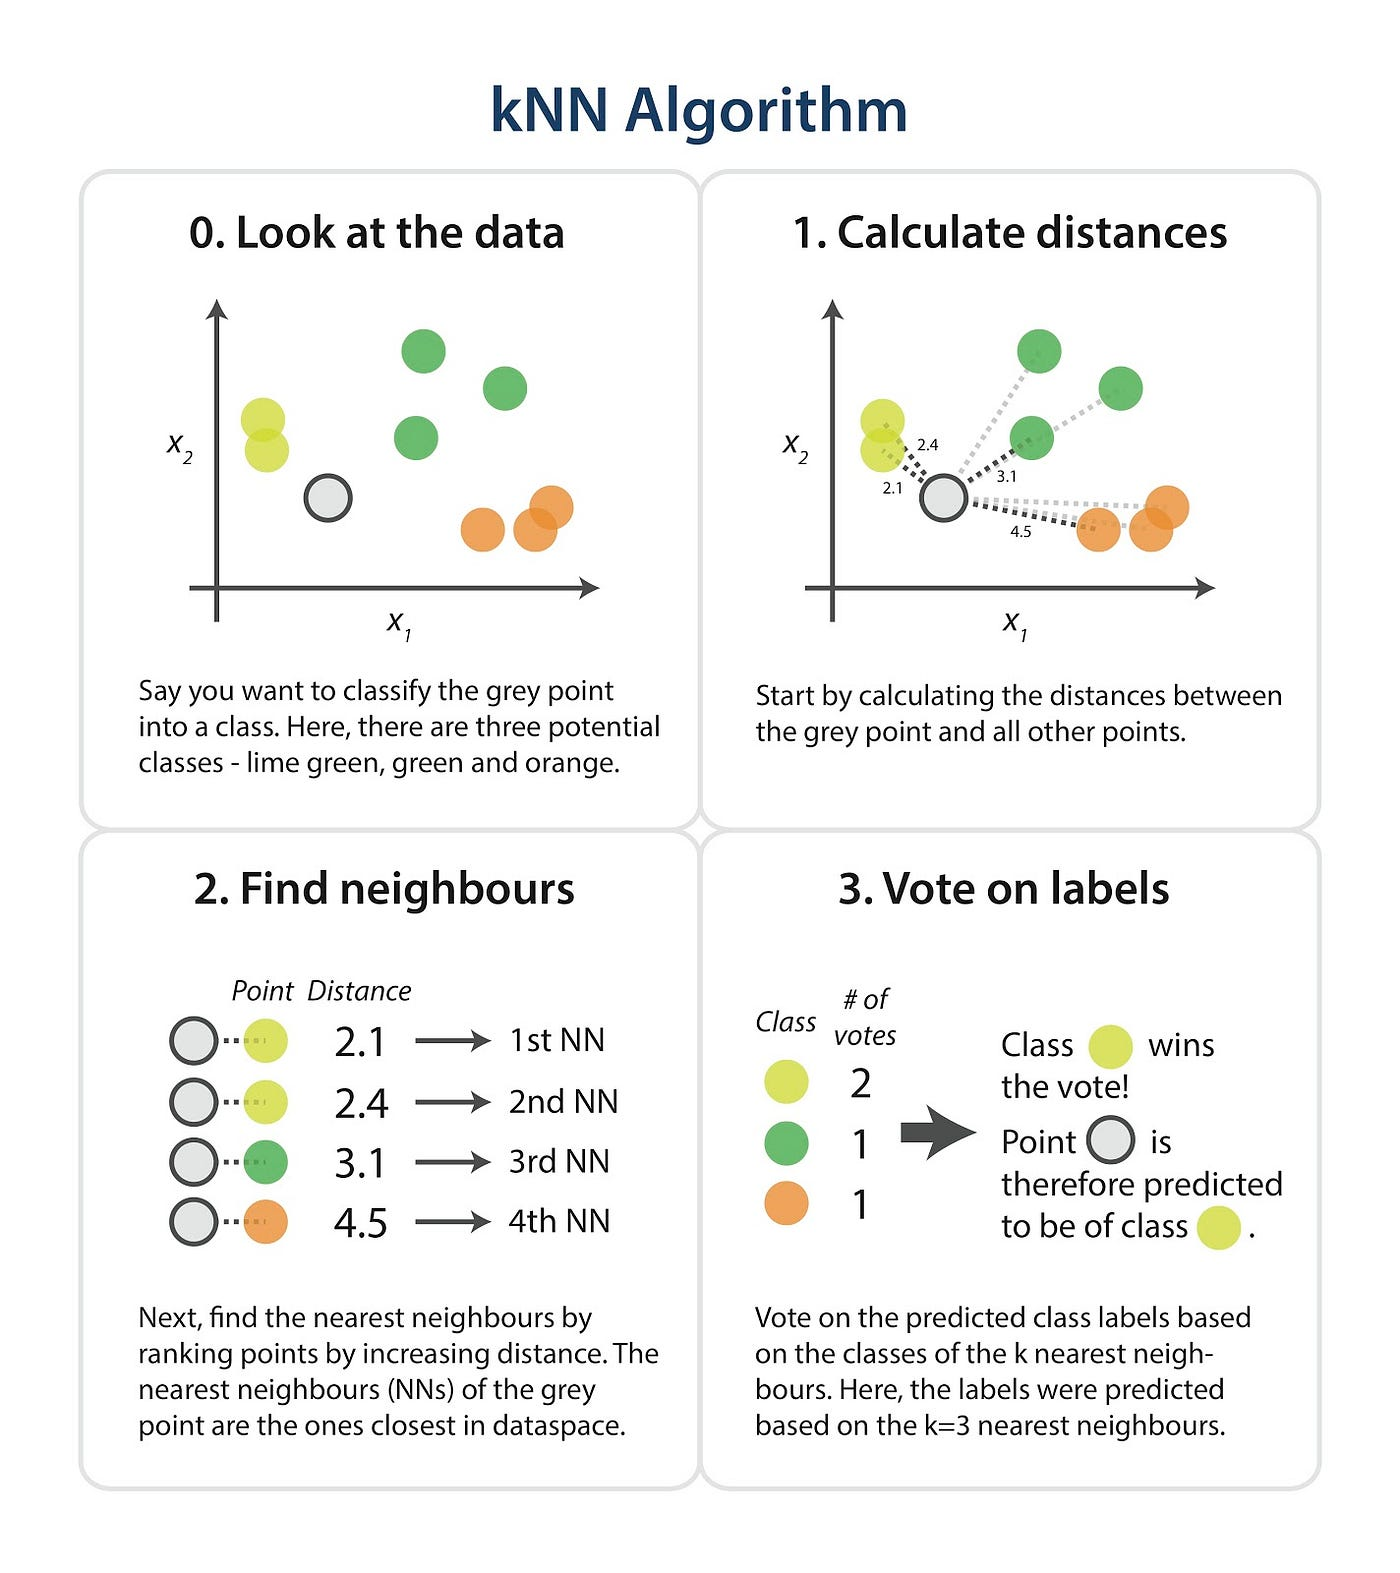###

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [12]:
y_pred_valid = knn_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy: {accuracy_valid:.4f}")


Validation Accuracy: 1.0000


Here are some other common evaluation metrics for classification in sklearn:


```
confusion_matrix()
```


Confusion Matrix: This is a table that summarizes the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.
Reasoning: A confusion matrix provides a detailed breakdown of how the model is performing on each class, which can be more informative than a single metric like accuracy, especially for imbalanced datasets. sklearn provides confusion_matrix.

```
precision_score()
```
Precision: Precision is the ratio of true positive predictions to the total number of positive predictions (true positives + false positives). It measures the accuracy of the positive predictions.
Reasoning: Precision is important when the cost of a false positive is high. sklearn provides precision_score.
Recall (Sensitivity or True Positive Rate): Recall is the ratio of true positive predictions to the total number of actual positive samples (true positives + false negatives). It measures the model's ability to find all the positive samples.

```
recall_score()
```
Reasoning: Recall is important when the cost of a false negative is high. sklearn provides recall_score.
F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall.
```
f1_score()
```
Reasoning: The F1-score is a good metric to use when you want to consider both precision and recall, especially for imbalanced datasets. [2] sklearn provides f1_score.
AUC-ROC Curve (Area Under the Receiver Operating Characteristic Curve): The ROC curve plots the true positive rate against the false positive rate at various threshold settings. The AUC is the area under the ROC curve, which provides a measure of the model's ability to distinguish between classes.



Reasoning: **AUC-ROC** is a useful metric for evaluating the overall performance of a classification model, especially for binary classification. sklearn provides roc_curve and roc_auc_score.
Log Loss (Cross-Entropy Loss): Log loss is a measure of the model's prediction uncertainty. It penalizes the model more for confident wrong predictions than for uncertain wrong predictions.


Reasoning: **Log loss** is often used for evaluating probabilistic outputs of classification models. [1] sklearn provides log_loss.
Jaccard Score: The Jaccard similarity coefficient, or Jaccard index, is a statistic used for comparing the similarity and diversity of sample sets. In classification, it is the size of the intersection divided by the size of the union of the predicted and actual sets of samples for a given class.

Reasoning: The **Jaccard score** is useful when you are interested in the similarity between the predicted and actual sets of samples. [1] sklearn provides jaccard_score.

In [13]:
y_pred = knn_model.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test:.4f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.90      0.95        10
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Test Accuracy: 0.9667




```
.predict()
``` This is a method provided by the scikit-learn KNeighborsClassifier class. It takes a set of features as input and outputs the predicted class labels for each data point.

In [15]:
for neighbor in range(3, 16):
  knn_model = KNeighborsClassifier(n_neighbors=neighbor)
  knn_model.fit(X_train, y_train)
  y_pred_valid = knn_model.predict(X_valid)
  accuracy_valid = accuracy_score(y_valid, y_pred_valid)
  y_pred = knn_model.predict(X_test)
  accuracy_test = accuracy_score(y_test, y_pred)
  print(f"Test Accuracy (k={neighbor}): {accuracy_test:.4f}")

Test Accuracy (k=3): 0.8667
Test Accuracy (k=4): 0.9333
Test Accuracy (k=5): 0.9333
Test Accuracy (k=6): 0.9667
Test Accuracy (k=7): 0.9667
Test Accuracy (k=8): 0.9667
Test Accuracy (k=9): 0.9667
Test Accuracy (k=10): 0.9667
Test Accuracy (k=11): 0.9333
Test Accuracy (k=12): 0.9333
Test Accuracy (k=13): 0.9333
Test Accuracy (k=14): 0.9333
Test Accuracy (k=15): 0.9333


#Naive Bayes#

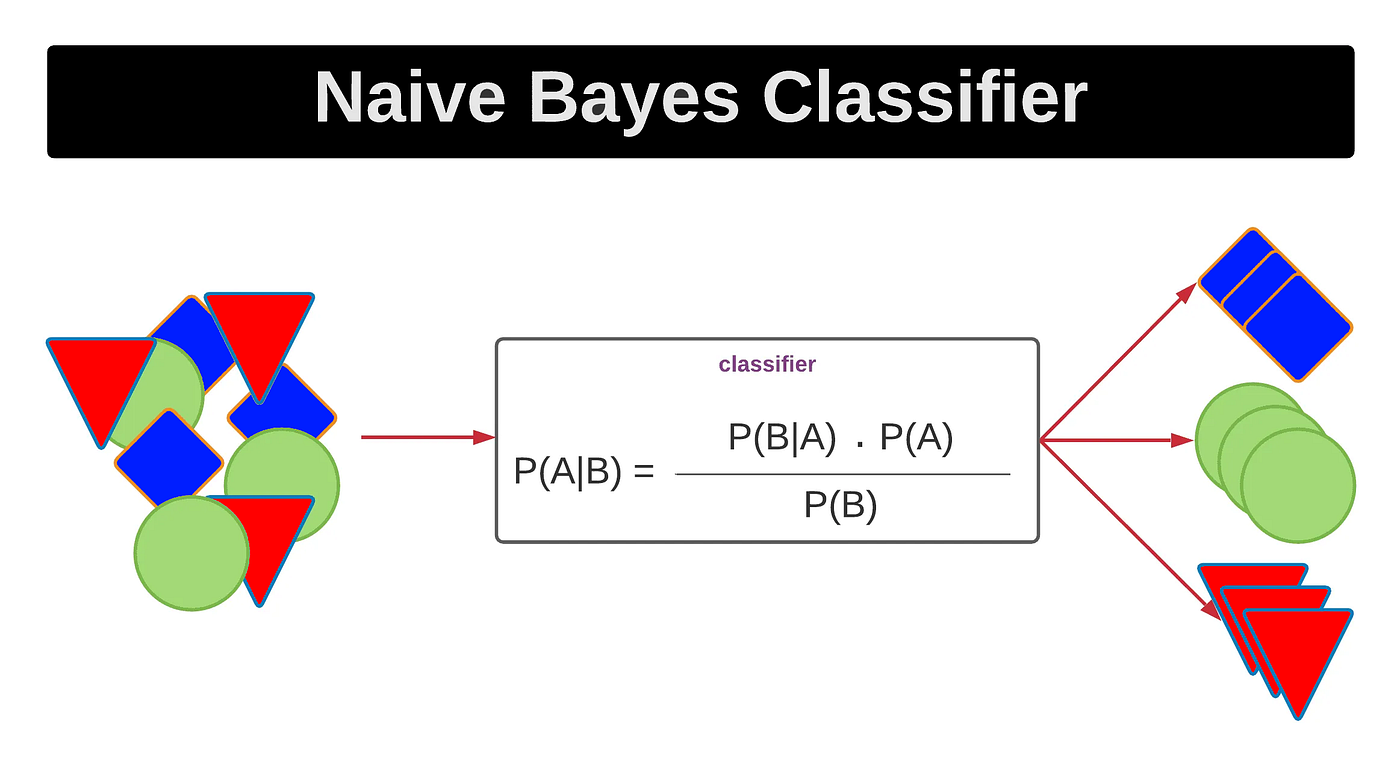

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_valid = nb_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy: {accuracy_valid:.4f}")


y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test:.4f}")

Validation Accuracy: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.60      0.75        10
           2       0.64      1.00      0.78         7

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.84        30
weighted avg       0.92      0.87      0.86        30

Test Accuracy: 0.8667


#Logistic Regression#

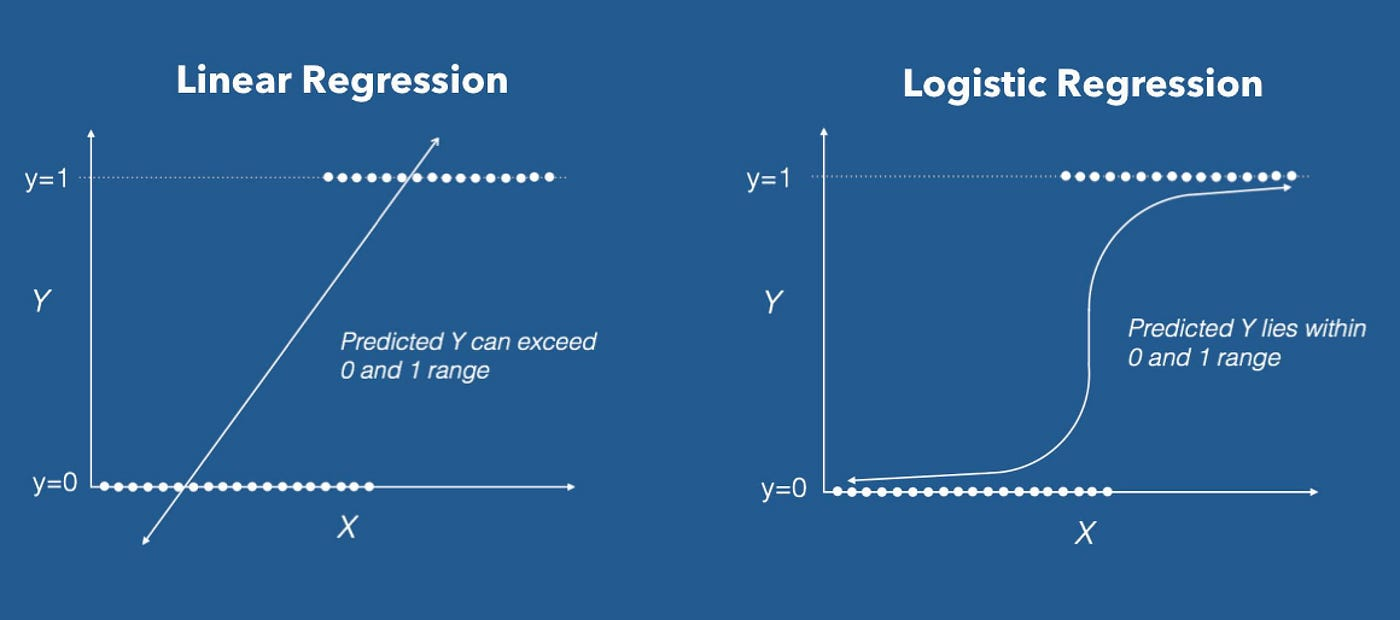

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_valid = lr_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy: {accuracy_valid:.4f}")

y_pred_test = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_test))
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test:.4f}")

Validation Accuracy: 0.9667
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      0.70      0.78        10
           2       0.70      1.00      0.82         7

    accuracy                           0.87        30
   macro avg       0.86      0.87      0.85        30
weighted avg       0.89      0.87      0.87        30

Test Accuracy: 0.8667


#SVM#
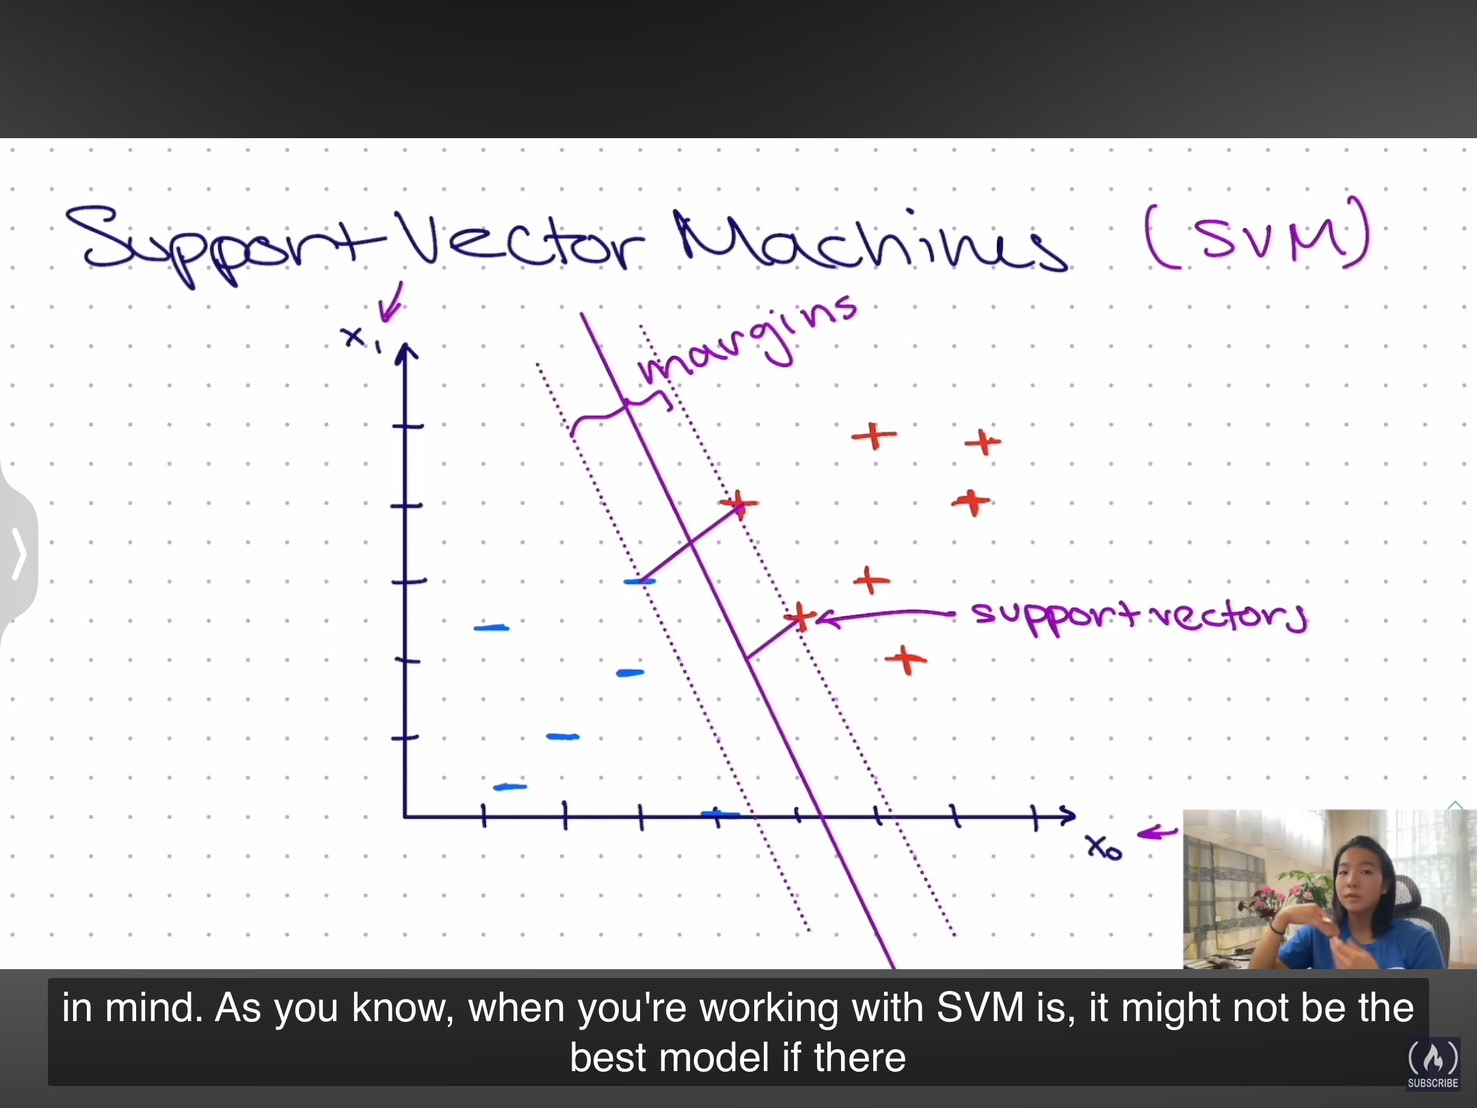

In [20]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_valid = svm_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy: {accuracy_valid:.4f}")

y_pred_test = svm_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test:.4f}")

print(classification_report(y_test, y_pred_test))

Validation Accuracy: 1.0000
Test Accuracy: 0.9000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.70      0.82        10
           2       0.70      1.00      0.82         7

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.88        30
weighted avg       0.93      0.90      0.90        30



#Neural Network#

In [22]:
import tensorflow as tf

In [23]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.legend()
  plt.show()


In [24]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(4,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(3, activation='softmax')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='sparse_categorical_crossentropy', # Change loss function since iris have 3 classesbinary crossentropy don't work
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

```dropout_prob``` : This is the probability of dropping out neurons during training, a technique to prevent overfitting.

overfit model makes excellent predictions on the training set but poor predictions on new data. An underfit model doesn't even make good predictions on the training data.


```
  return nn_model, history```
 returns the trained neural network model (nn_model) and a history object, which contains information about the training process, such as the loss and accuracy at each epoch.

 ```validation_split=0.2``` reserves 20% of the training data for validation during training.

 Output Layer and Loss Function: You have a ```tf.keras.layers.Dense(1, activation='sigmoid')``` as the output layer and ```loss='binary_crossentropy'``` as the loss function. This setup is designed for binary classification, meaning you are trying to classify data into two classes. However, the Iris dataset has **three distinct classes** (Iris-setosa, Iris-versicolor, and Iris-virginica), as indicated by the df['class'].unique() output in your notebook.

Problem: Your model is trying to perform binary classification on a multi-class problem. The sigmoid activation outputs a single value between 0 and 1, which is suitable for predicting the probability of belonging to one of two classes. binary_crossentropy is also designed for this scenario.
Label Encoding: You used LabelEncoder to transform the 'class' column into numerical labels (0, 1, 2). While this is necessary for neural networks, using these numerical labels directly with binary_crossentropy is incorrect for multi-class problems. binary_crossentropy expects target values to be 0 or 1.

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


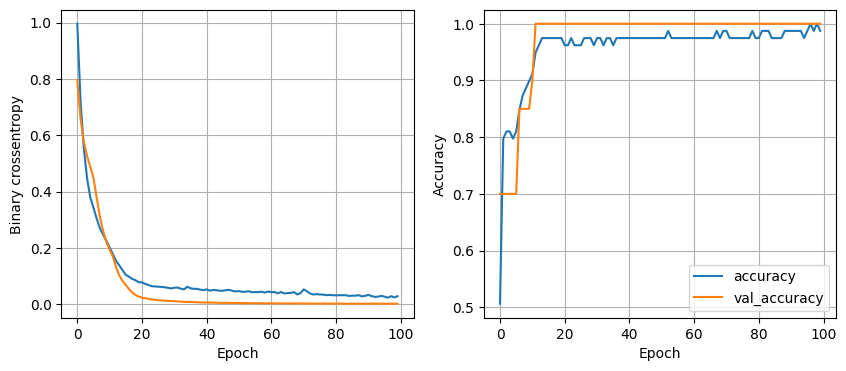

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.9667 - loss: 0.1253
16 nodes, dropout 0, lr 0.01, batch size 64


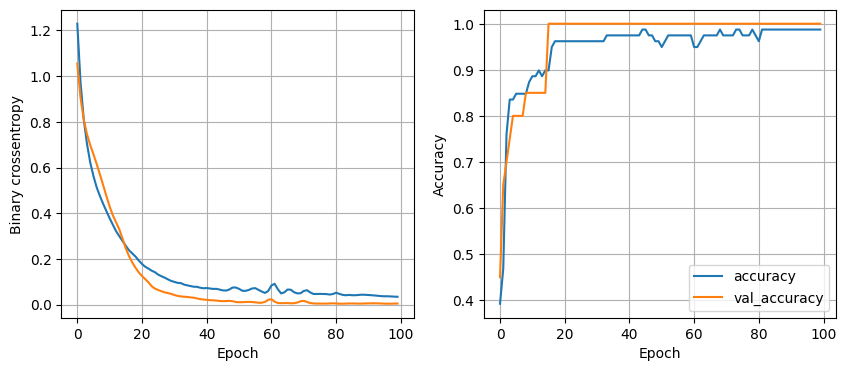

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9667 - loss: 0.1008
16 nodes, dropout 0, lr 0.01, batch size 128


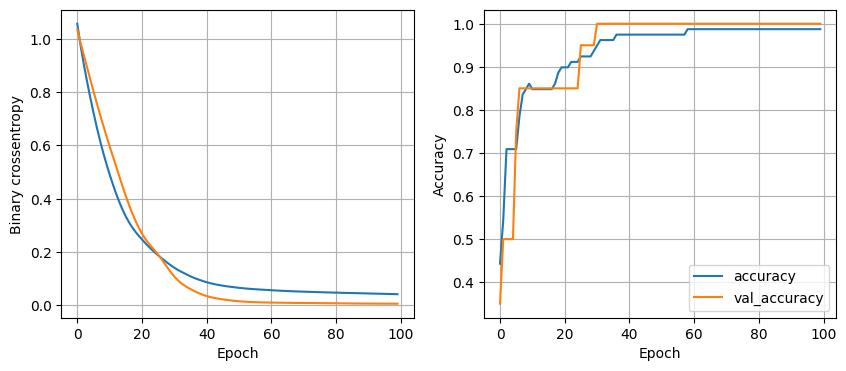

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9667 - loss: 0.0603
16 nodes, dropout 0, lr 0.005, batch size 32


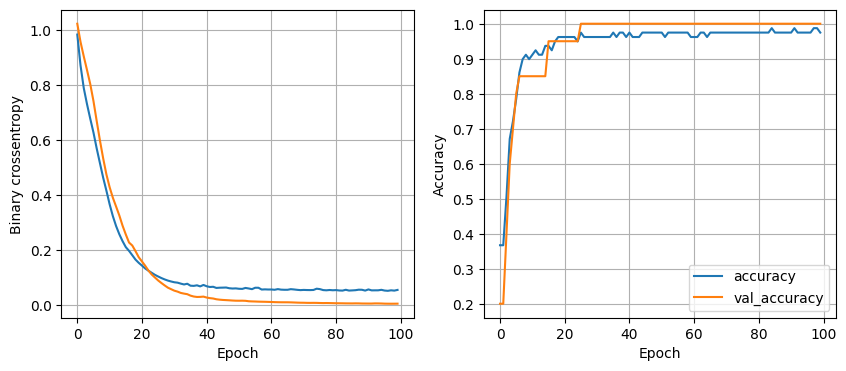

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9667 - loss: 0.0783
16 nodes, dropout 0, lr 0.005, batch size 64


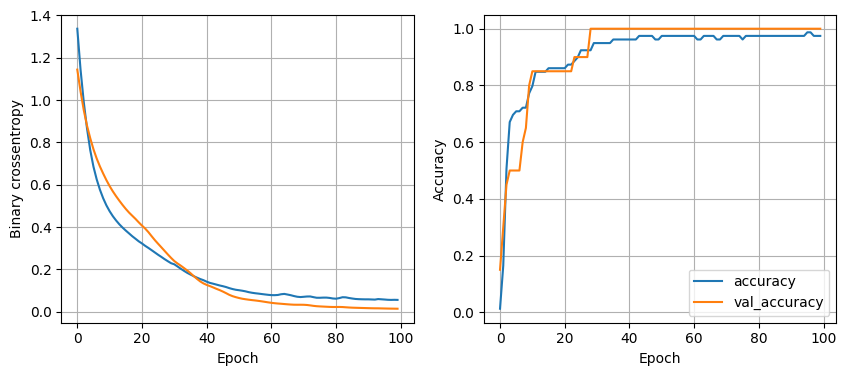

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9667 - loss: 0.0652
16 nodes, dropout 0, lr 0.005, batch size 128


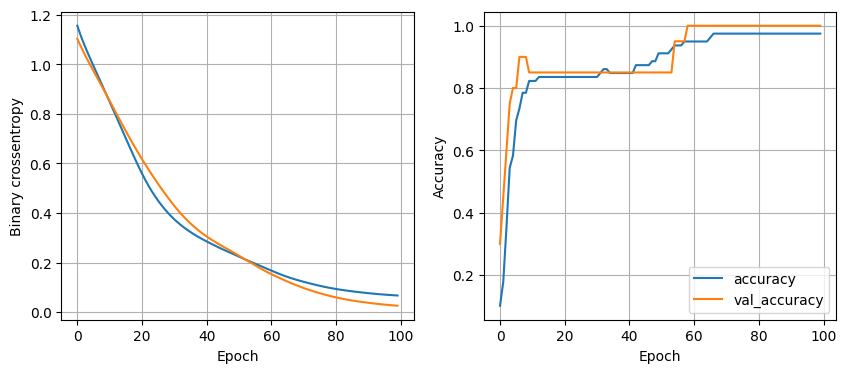

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.9667 - loss: 0.0884
16 nodes, dropout 0, lr 0.001, batch size 32


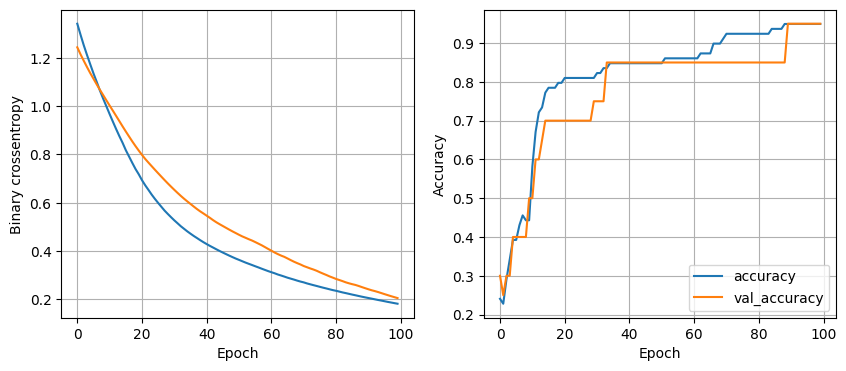

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9667 - loss: 0.1971
16 nodes, dropout 0, lr 0.001, batch size 64


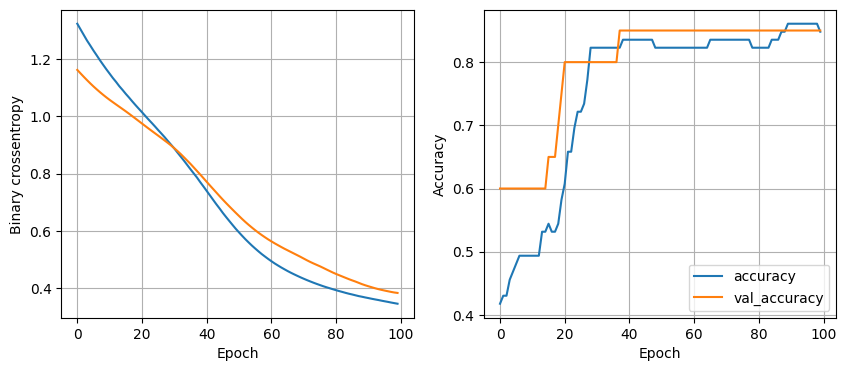

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step - accuracy: 0.9333 - loss: 0.3071
16 nodes, dropout 0, lr 0.001, batch size 128


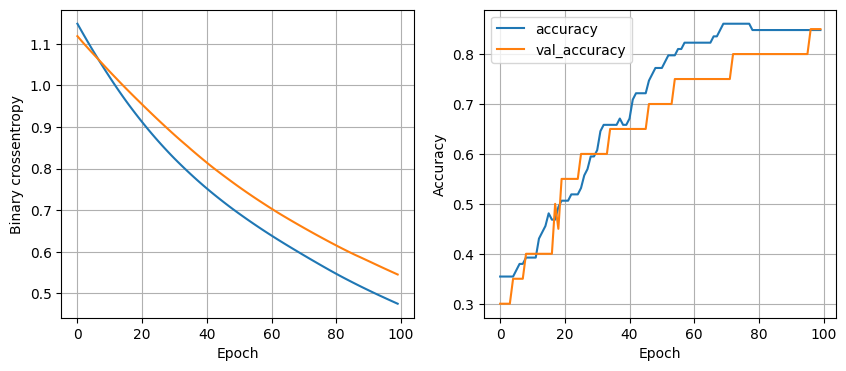

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.9000 - loss: 0.4807
16 nodes, dropout 0.2, lr 0.01, batch size 32


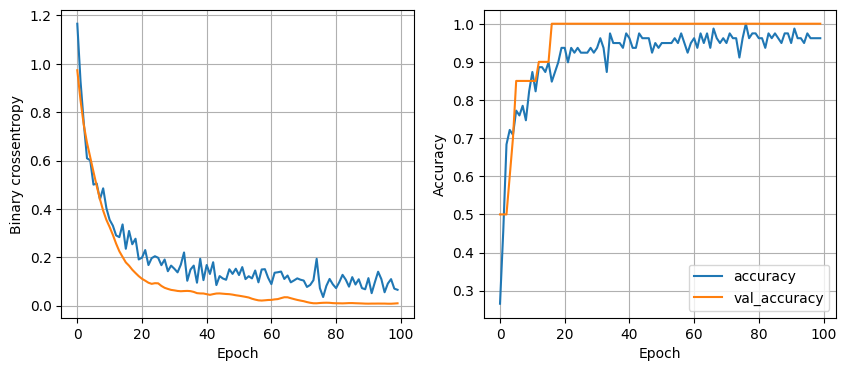

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9667 - loss: 0.0598
16 nodes, dropout 0.2, lr 0.01, batch size 64


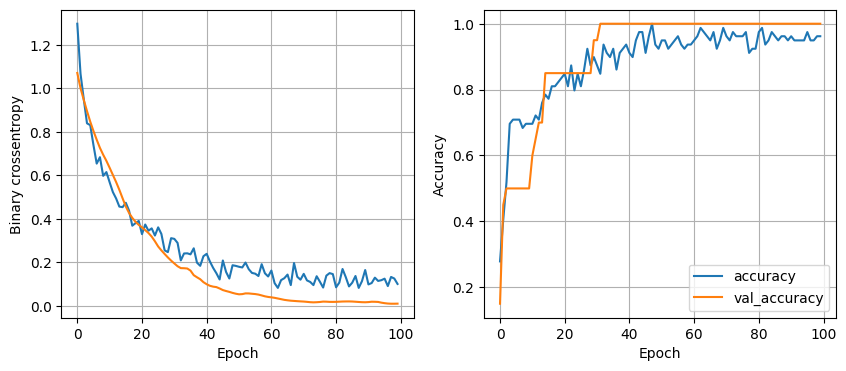

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9667 - loss: 0.0768
16 nodes, dropout 0.2, lr 0.01, batch size 128


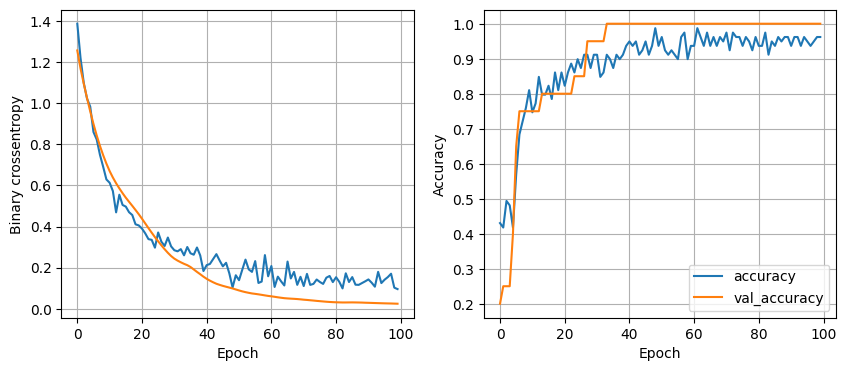

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9667 - loss: 0.0780
16 nodes, dropout 0.2, lr 0.005, batch size 32


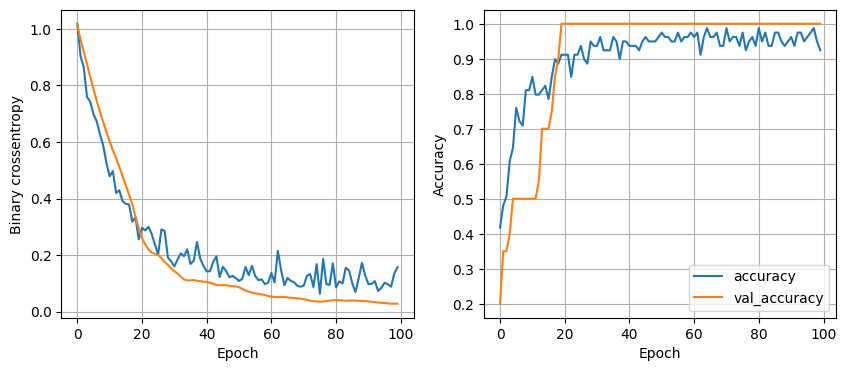

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9667 - loss: 0.0580
16 nodes, dropout 0.2, lr 0.005, batch size 64


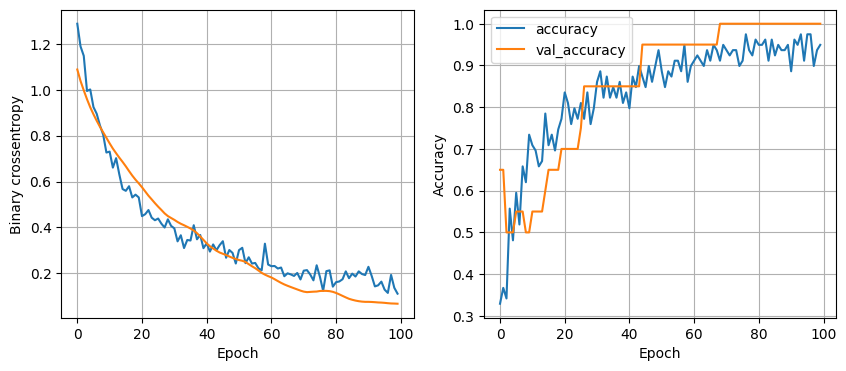

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9667 - loss: 0.1163
16 nodes, dropout 0.2, lr 0.005, batch size 128


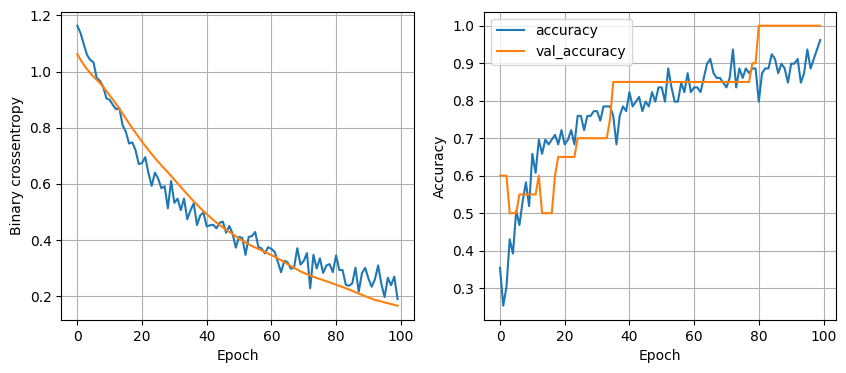

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9667 - loss: 0.1532
16 nodes, dropout 0.2, lr 0.001, batch size 32


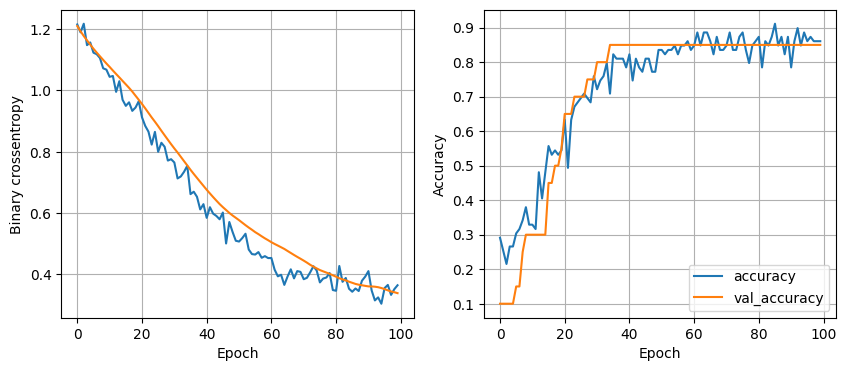

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9333 - loss: 0.2605
16 nodes, dropout 0.2, lr 0.001, batch size 64


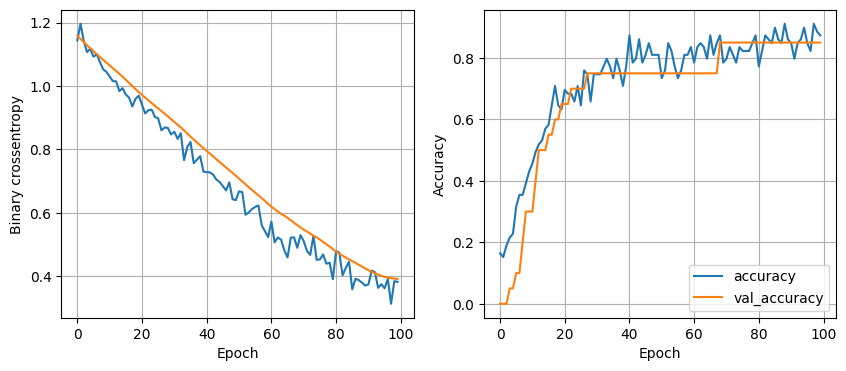

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9000 - loss: 0.3027
16 nodes, dropout 0.2, lr 0.001, batch size 128


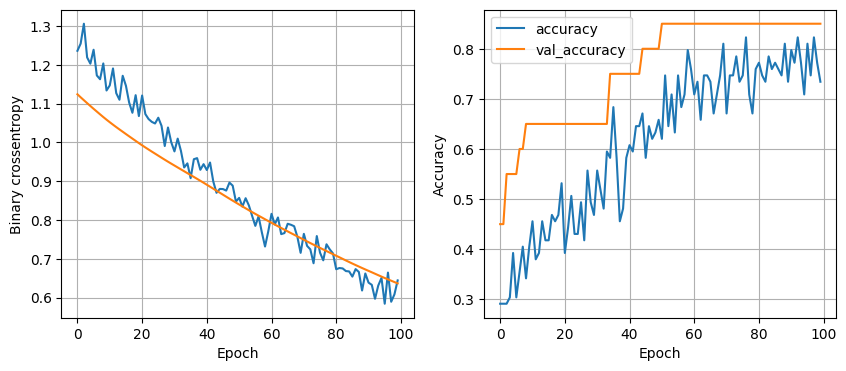

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.7667 - loss: 0.5632
32 nodes, dropout 0, lr 0.01, batch size 32


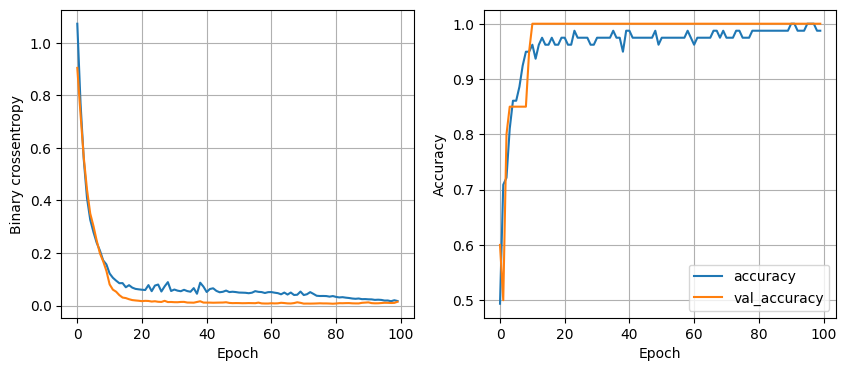

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.9667 - loss: 0.1180
32 nodes, dropout 0, lr 0.01, batch size 64


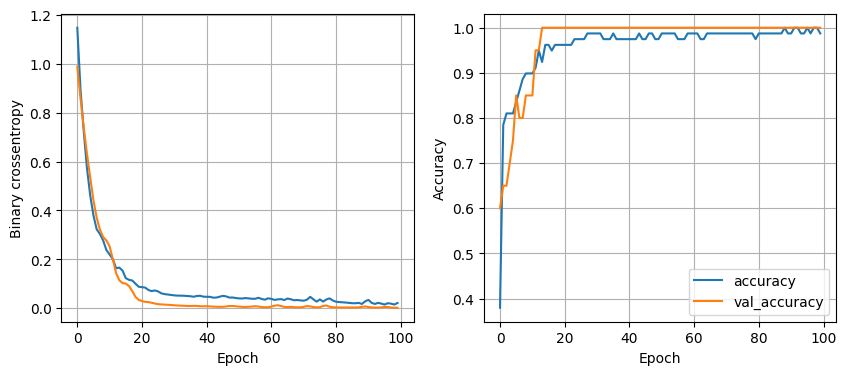

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9667 - loss: 0.0954
32 nodes, dropout 0, lr 0.01, batch size 128


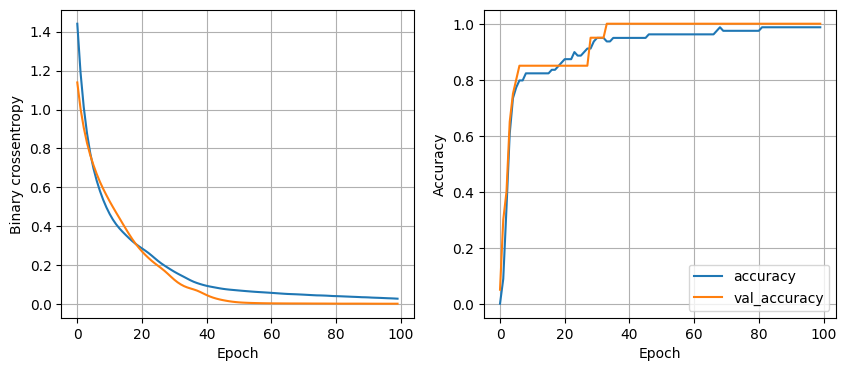

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9667 - loss: 0.0940
32 nodes, dropout 0, lr 0.005, batch size 32


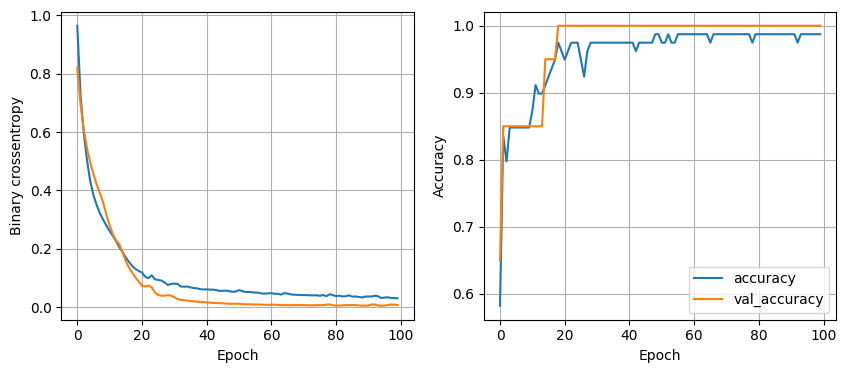

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9667 - loss: 0.1044
32 nodes, dropout 0, lr 0.005, batch size 64


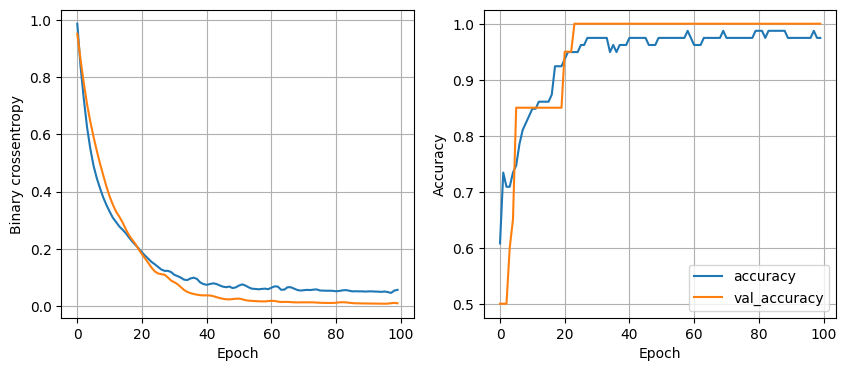

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9667 - loss: 0.0637
32 nodes, dropout 0, lr 0.005, batch size 128


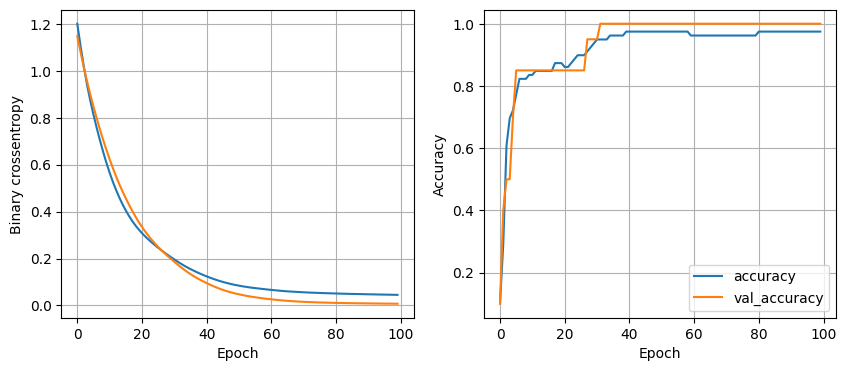

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9667 - loss: 0.0523
32 nodes, dropout 0, lr 0.001, batch size 32


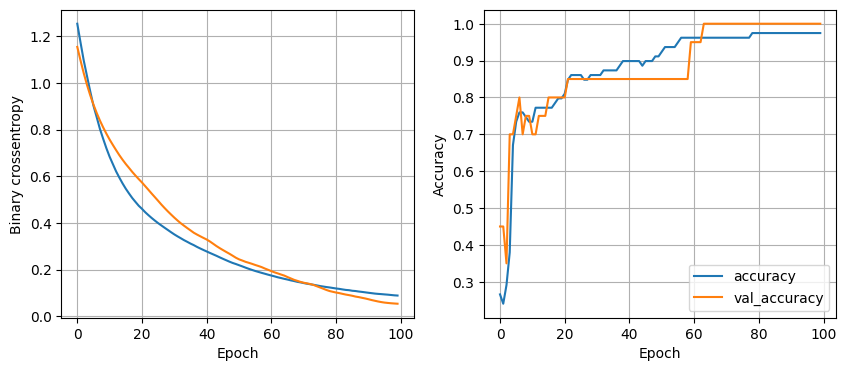

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9667 - loss: 0.1046
32 nodes, dropout 0, lr 0.001, batch size 64


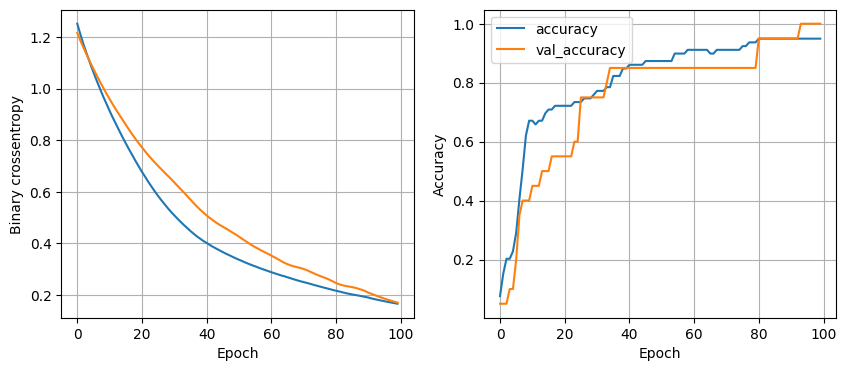

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9667 - loss: 0.1628
32 nodes, dropout 0, lr 0.001, batch size 128


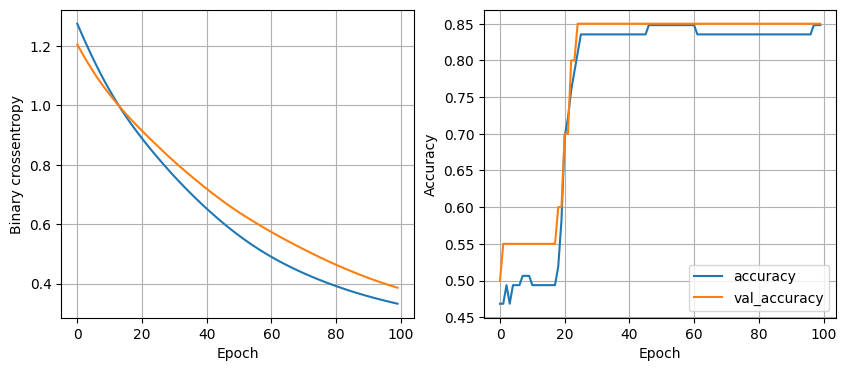

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.8667 - loss: 0.3115
32 nodes, dropout 0.2, lr 0.01, batch size 32


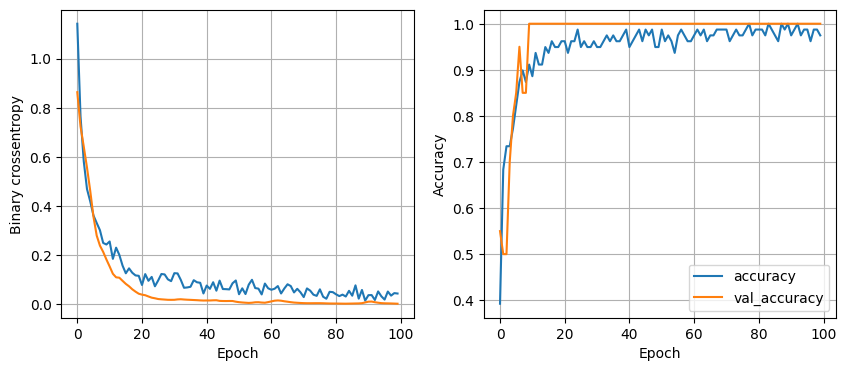

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.9667 - loss: 0.2088
32 nodes, dropout 0.2, lr 0.01, batch size 64


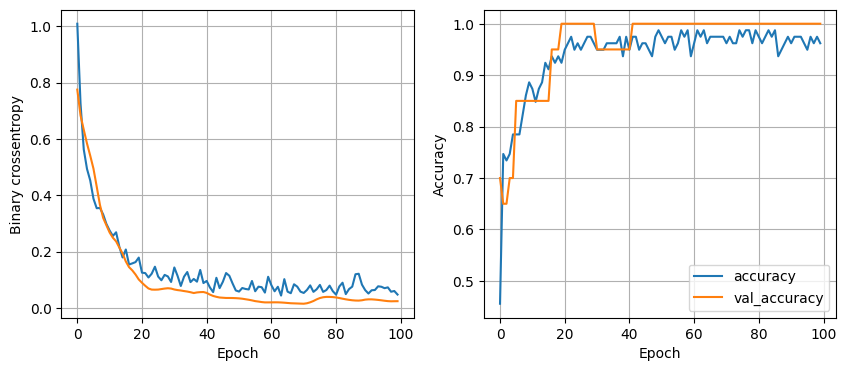

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9667 - loss: 0.1591
32 nodes, dropout 0.2, lr 0.01, batch size 128


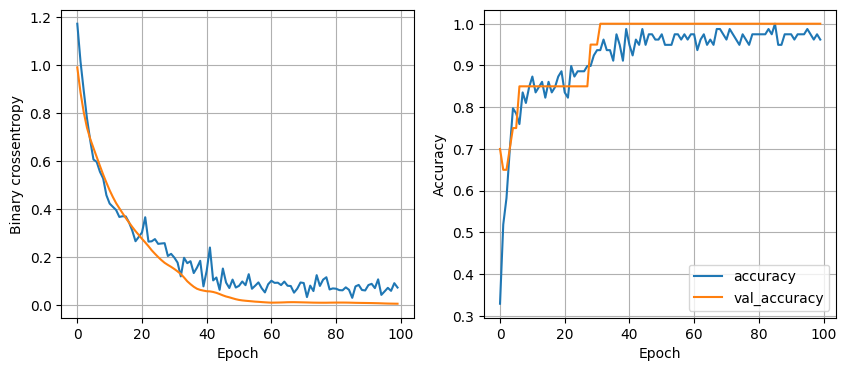

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9667 - loss: 0.0534
32 nodes, dropout 0.2, lr 0.005, batch size 32


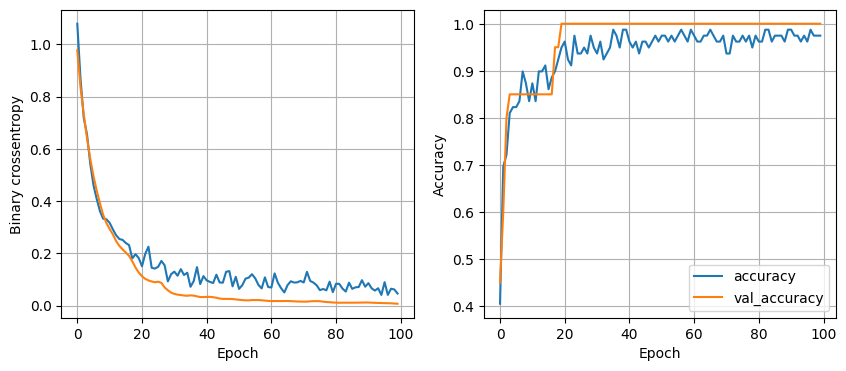

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9667 - loss: 0.0961
32 nodes, dropout 0.2, lr 0.005, batch size 64


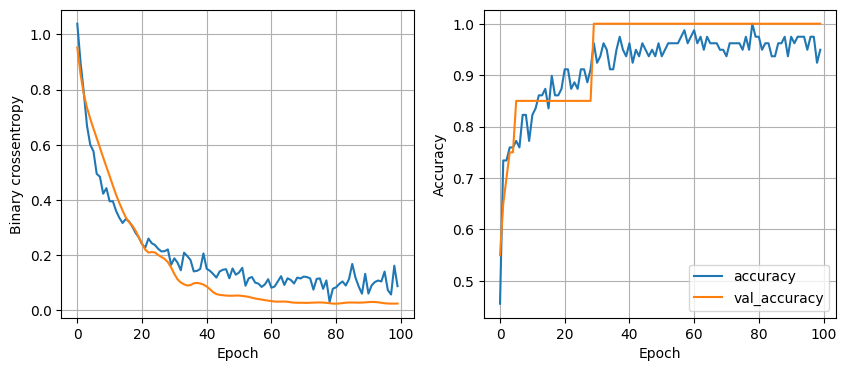

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.9667 - loss: 0.0656
32 nodes, dropout 0.2, lr 0.005, batch size 128


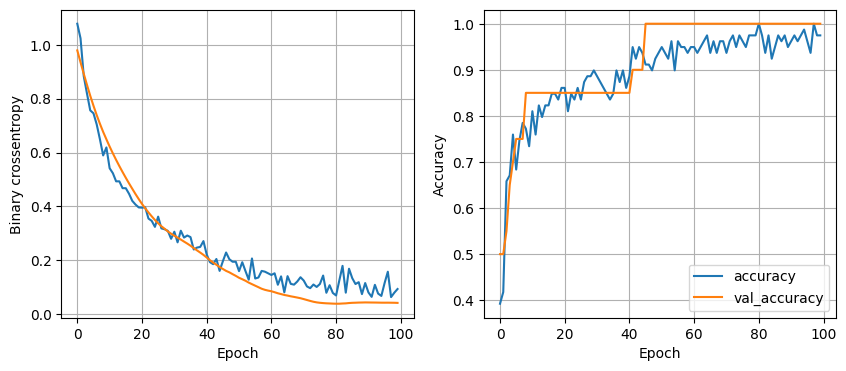

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9667 - loss: 0.0637
32 nodes, dropout 0.2, lr 0.001, batch size 32


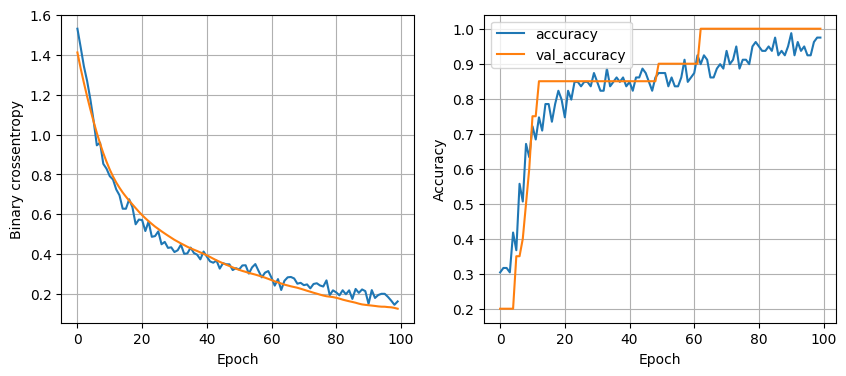

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9667 - loss: 0.1437
32 nodes, dropout 0.2, lr 0.001, batch size 64


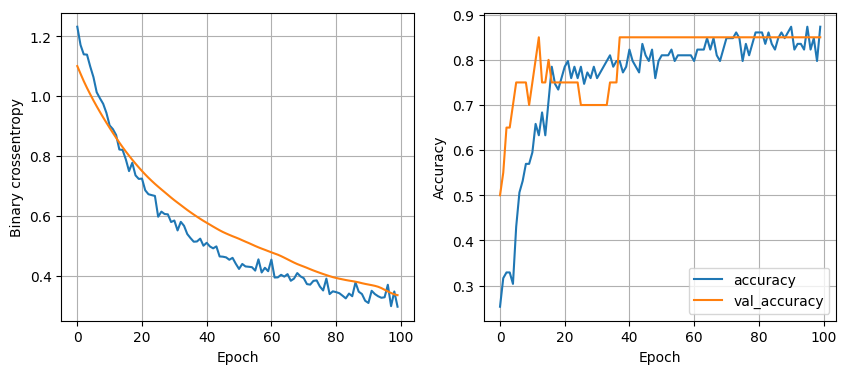

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.8667 - loss: 0.2868
32 nodes, dropout 0.2, lr 0.001, batch size 128


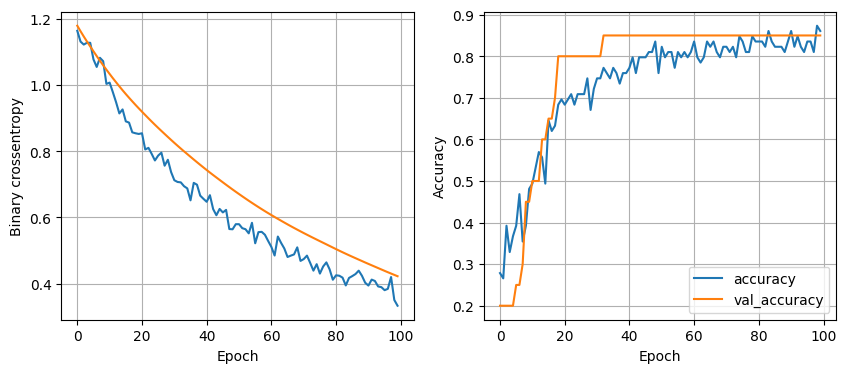

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.8667 - loss: 0.3456
64 nodes, dropout 0, lr 0.01, batch size 32


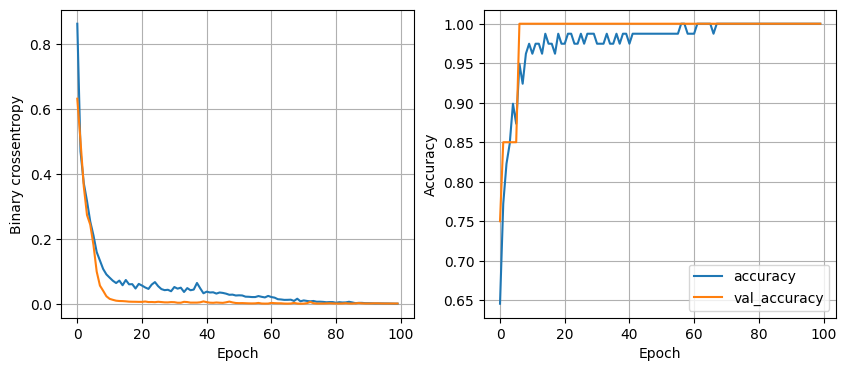

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.9667 - loss: 0.2335
64 nodes, dropout 0, lr 0.01, batch size 64


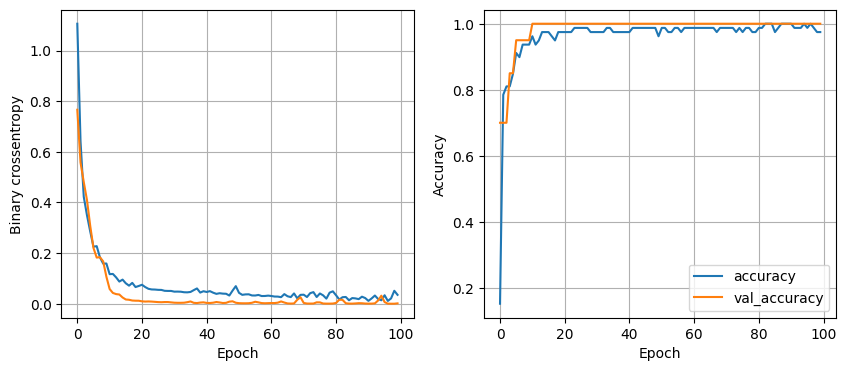

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9667 - loss: 0.0757
64 nodes, dropout 0, lr 0.01, batch size 128


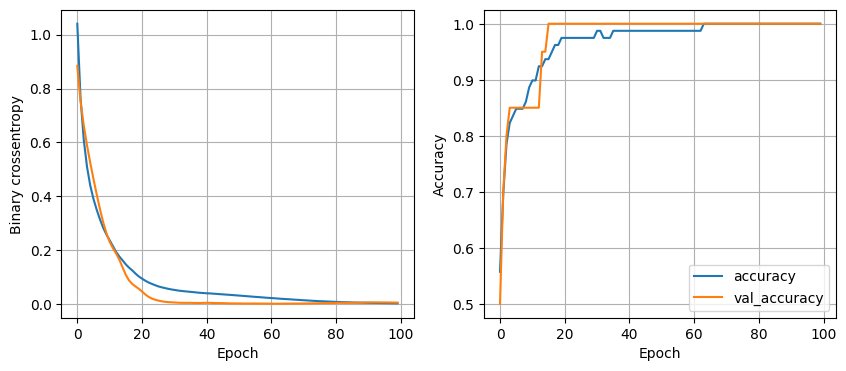

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9667 - loss: 0.1383
64 nodes, dropout 0, lr 0.005, batch size 32


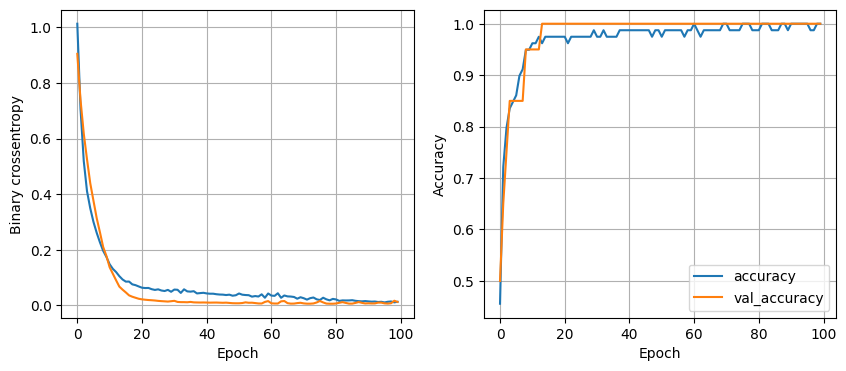

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9333 - loss: 0.1941
64 nodes, dropout 0, lr 0.005, batch size 64


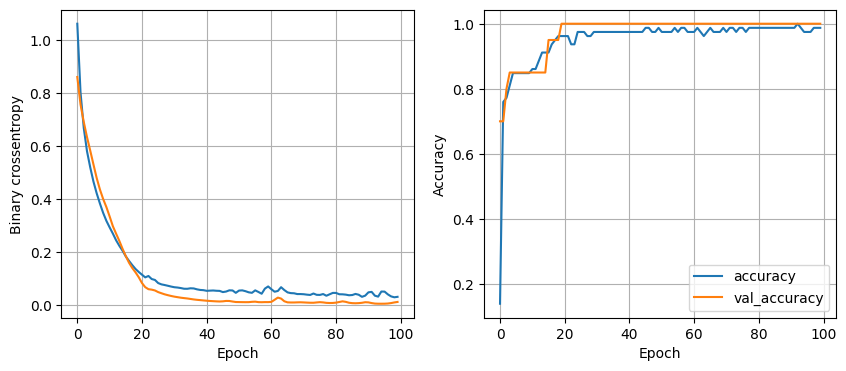

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9667 - loss: 0.0578
64 nodes, dropout 0, lr 0.005, batch size 128


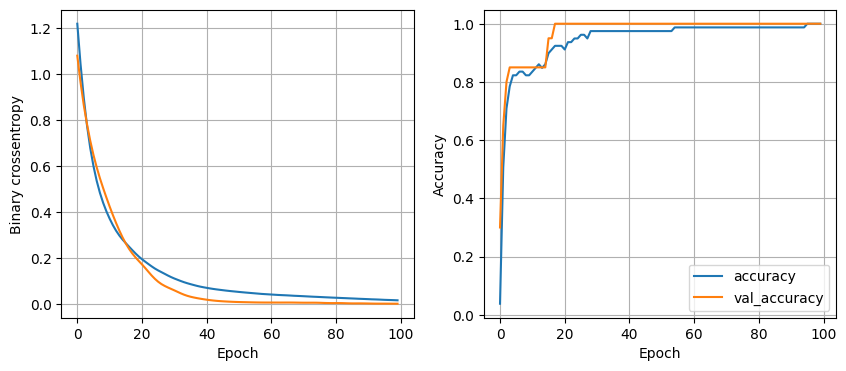

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9667 - loss: 0.0631
64 nodes, dropout 0, lr 0.001, batch size 32


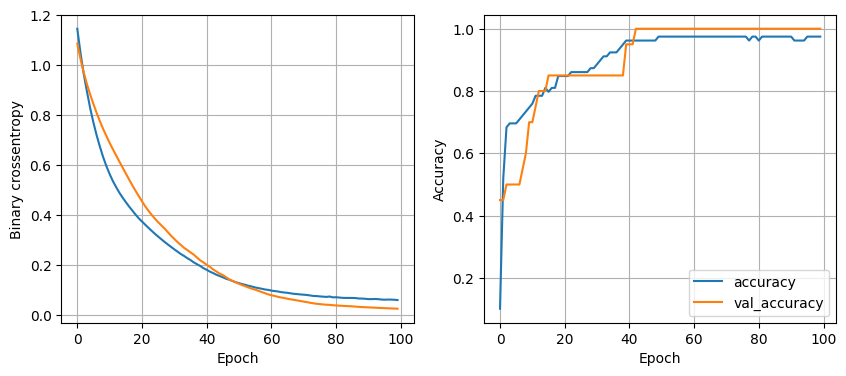

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9667 - loss: 0.0639
64 nodes, dropout 0, lr 0.001, batch size 64


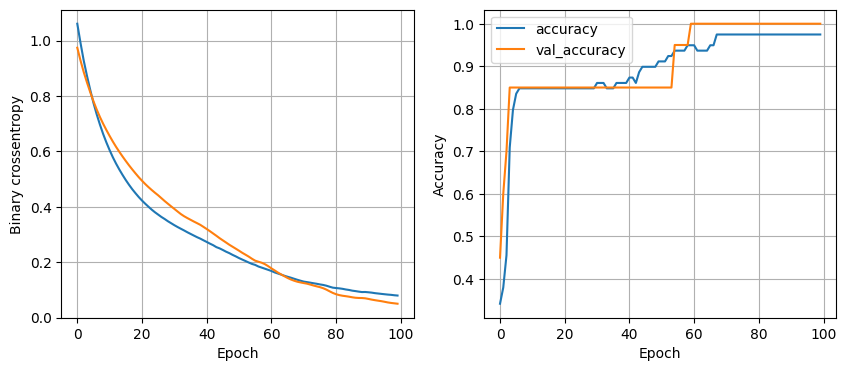

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9667 - loss: 0.1002
64 nodes, dropout 0, lr 0.001, batch size 128


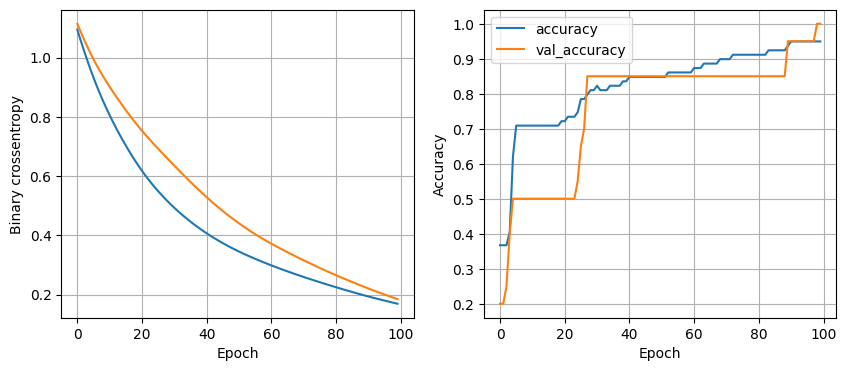

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.9333 - loss: 0.1937
64 nodes, dropout 0.2, lr 0.01, batch size 32


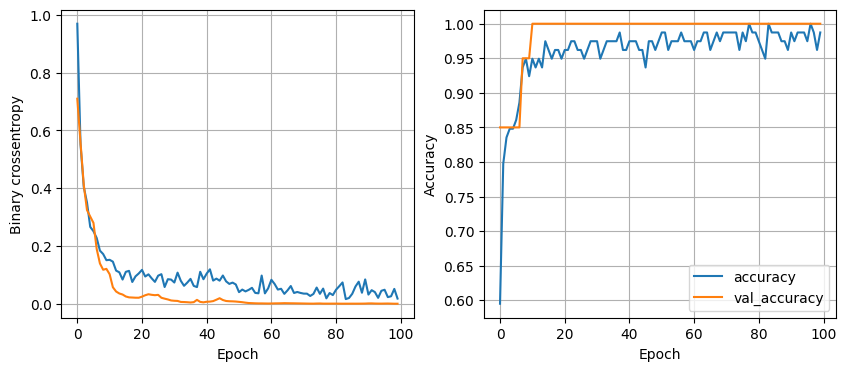

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9667 - loss: 0.1420
64 nodes, dropout 0.2, lr 0.01, batch size 64


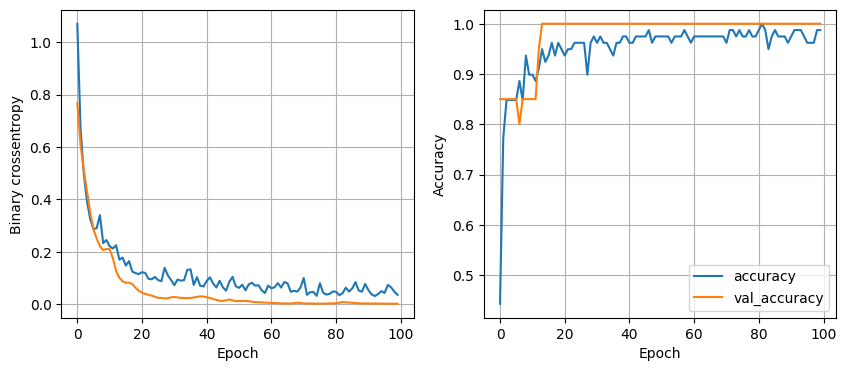

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9667 - loss: 0.0975
64 nodes, dropout 0.2, lr 0.01, batch size 128


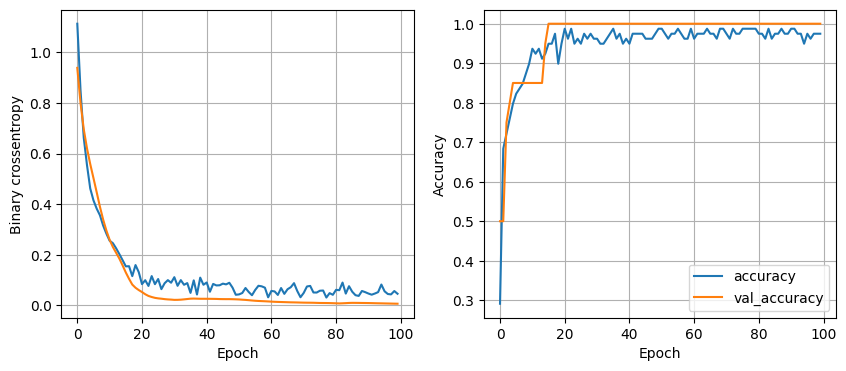

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.9667 - loss: 0.0527
64 nodes, dropout 0.2, lr 0.005, batch size 32


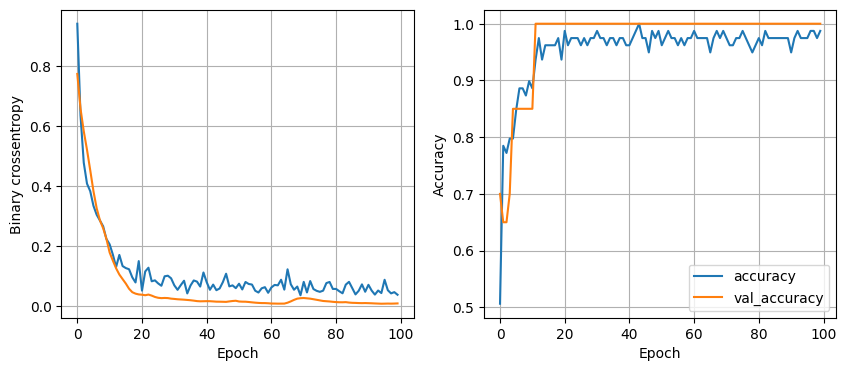

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9667 - loss: 0.1010
64 nodes, dropout 0.2, lr 0.005, batch size 64


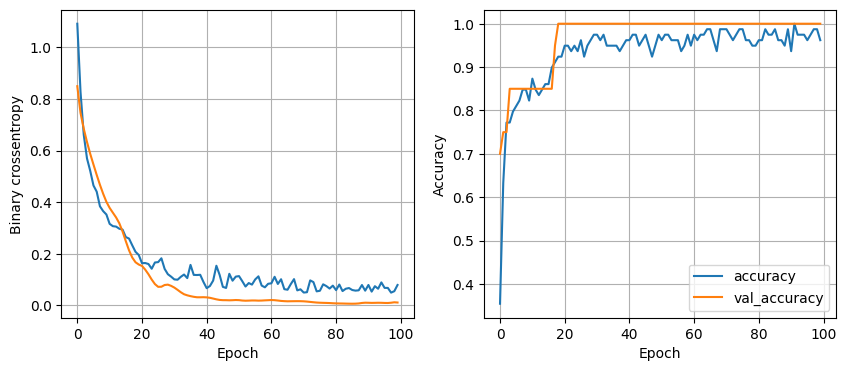

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9667 - loss: 0.0682
64 nodes, dropout 0.2, lr 0.005, batch size 128


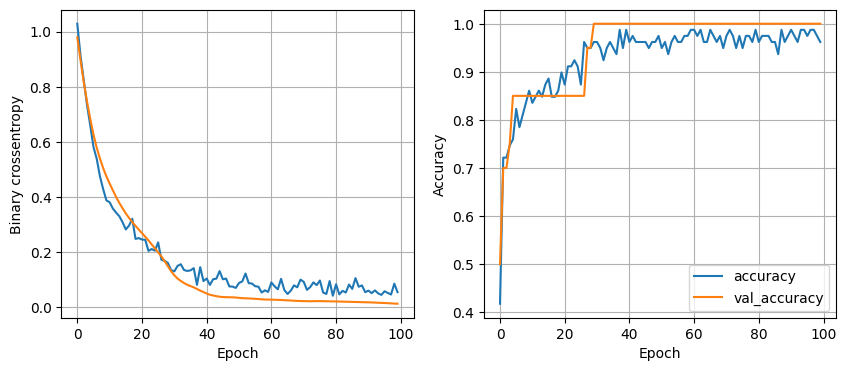

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9667 - loss: 0.0605
64 nodes, dropout 0.2, lr 0.001, batch size 32


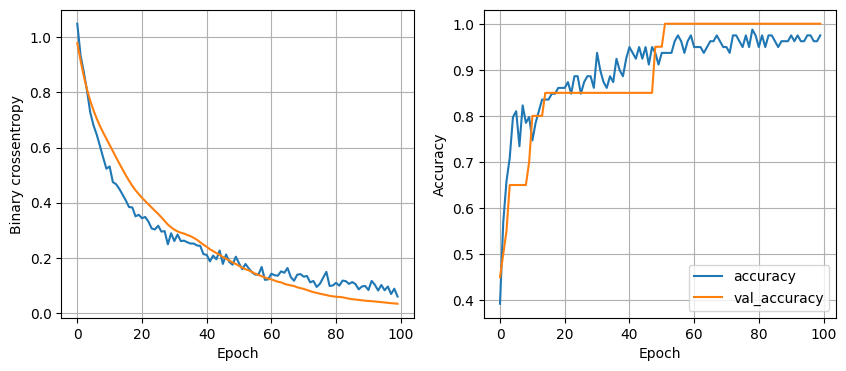

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9667 - loss: 0.0852
64 nodes, dropout 0.2, lr 0.001, batch size 64


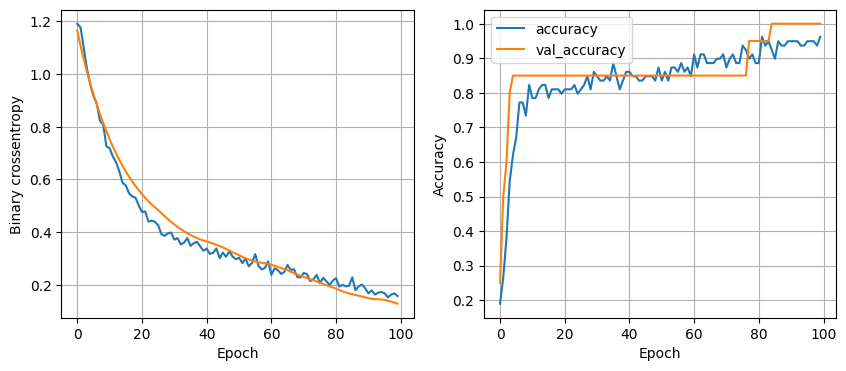

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9667 - loss: 0.1435
64 nodes, dropout 0.2, lr 0.001, batch size 128


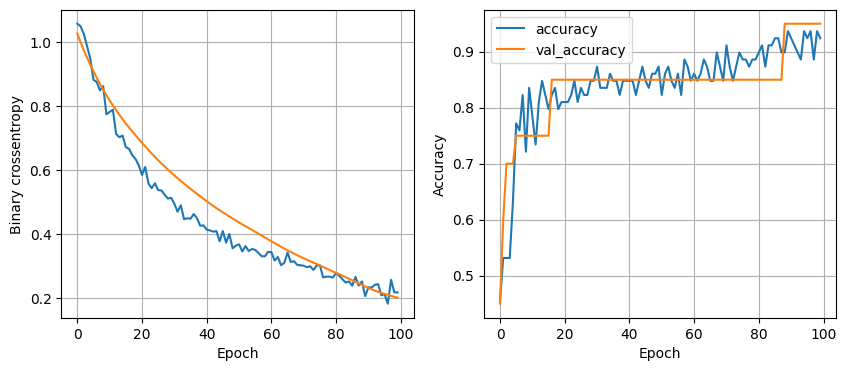

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9667 - loss: 0.1855


In [25]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

```least_val_loss``` is set to ```float('inf')```, which represents positive infinity. This is used to keep track of the lowest validation loss encountered so far.
```least_loss_model``` is initialized to ```None```, and it will store the neural network model that achieves the least_val_loss.
```epochs``` is set to ```100```, determining the number of training iterations for each neural network model.

```val_loss = model.evaluate(X_valid, y_valid)[0]``` evaluates the trained model on the validation dataset ```(X_valid, y_valid)```. The ```.evaluate()``` method returns a list of metrics, and we are taking the first element [0], which corresponds to the loss (specifically, binary crossentropy in this case).
The ```if val_loss < least_val_loss:``` statement checks if the validation loss of the current model is lower than the ```least_val_loss``` found so far.
If the current validation loss is indeed lower, ```least_val_loss``` is updated to this new lower value, and ```least_loss_model``` is updated to store the current model.

```num_nodes```:
More nodes might lead to a more complex model that can fit the training data better (lower training loss, higher training accuracy).
However, too many nodes can lead to overfitting, where the validation loss increases and validation accuracy plateaus or decreases.

```dropout_prob```:
Dropout is a regularization technique to prevent overfitting. A non-zero dropout probability (e.g., 0.2) should ideally help the model generalize better, leading to smaller gaps between training and validation curves.
Too much dropout can hinder the model's ability to learn effectively.

```lr```:
A higher learning rate can lead to faster convergence, but it might overshoot the optimal solution and cause oscillations in loss.
A lower learning rate can lead to slower convergence but might find a better optimum.

```batch_size```:
Larger batch sizes can provide a more stable gradient estimate, potentially leading to smoother convergence.
Smaller batch sizes can introduce more noise, which might help the model escape local minima and generalize better, but can also lead to less stable training.

In [26]:
y_pred_probabilities = least_loss_model.predict(X_test)
print(y_pred_probabilities)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
[[4.1281595e-04 9.6580392e-01 3.3783183e-02]
 [1.0677131e-04 2.4947664e-01 7.5041664e-01]
 [9.9891460e-01 5.4462132e-04 5.4068415e-04]
 [1.9086589e-01 8.0867988e-01 4.5427878e-04]
 [9.8412784e-05 9.9965048e-01 2.5110316e-04]
 [1.4135895e-06 7.0001923e-05 9.9992859e-01]
 [9.9916530e-01 3.5377059e-04 4.8098899e-04]
 [1.4312477e-04 9.9047112e-01 9.3857199e-03]
 [8.6372826e-11 3.1898043e-08 1.0000000e+00]
 [8.4412534e-04 8.2984936e-01 1.6930650e-01]
 [9.9921811e-01 5.3631613e-04 2.4557949e-04]
 [9.9394763e-01 5.5295243e-03 5.2283134e-04]
 [1.1486794e-06 3.3604279e-05 9.9996519e-01]
 [9.9875045e-01 9.0610894e-04 3.4338119e-04]
 [2.1657867e-03 8.0917463e-02 9.1691673e-01]
 [2.0340922e-06 9.9967408e-01 3.2390453e-04]
 [9.9393797e-01 5.6781354e-03 3.8389143e-04]
 [9.9948263e-01 2.6704287e-04 2.5036070e-04]
 [9.9940312e-01 2.9557332e-04 3.0128803e-04]
 [4.3688087e-05 9.9727029e-01 2.6860652e-03]
 [9.9940014e-01 3.1590191e-04 2.8393086e-04]
 [1.2444363e-07 

In [27]:
y_pred = np.argmax(y_pred_probabilities, axis=1)
print(y_pred)

[1 2 0 1 1 2 0 1 2 1 0 0 2 0 2 1 0 0 0 1 0 2 2 2 1 2 0 0 2 0]


```least_loss_model.predict(X_test)```: This line is calling the ```predict``` method of your trained neural network model ```(least_loss_model)```.
The X_test is your test dataset, which contains the features of the Iris flowers that the model has not seen during training or validation.
Since your output layer uses the ```'softmax'``` activation function and has 3 nodes (one for each class), the ```predict``` method will output a probability distribution over the three possible classes for each instance in ```X_test```.
```y_pred_probabilities``` will be a NumPy array where each row corresponds to a data point in ```X_test```, and each column represents the predicted probability of that data point belonging to one of the three Iris classes. For example, a row might look like ```[0.05, 0.90, 0.05]```, indicating a 5% probability of being class 0, a 90% probability of being class 1, and a 5% probability of being class 2.

```np.argmax(...)```: This is a NumPy function that returns the index of the maximum value along a specified axis.
```y_pred_probabilities```: This is the probability array calculated in the previous step.
```axis=1```: This specifies that the argmax operation should be performed along axis 1, which corresponds to the columns (the class probabilities) for each row (each data point).
For each data point in ```y_pred_probabilities```, ```np.argmax``` will find the column index that has the highest probability. This index corresponds to the class that the model predicts the data point belongs to.
```y_pred``` will be a NumPy array containing the predicted class label (0, 1, or 2) for each data point in the test set. This transforms the probability distribution into a single predicted class for each instance.

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      0.70      0.78        10
           2       0.70      1.00      0.82         7

    accuracy                           0.87        30
   macro avg       0.86      0.87      0.85        30
weighted avg       0.89      0.87      0.87        30



In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Let the model try guess the iris class by the given input

# Create a LabelEncoder object and fit it to your original 'class' data
# (This is necessary to inverse_transform the prediction)
le = LabelEncoder()
le.fit(df['class']) # df is your original DataFrame

# If you used StandardScaler, create and fit it to your training data
# scaler = StandardScaler()
# scaler.fit(X_train) # X_train is your training feature data

# --- Start of changes ---

sepal_length	= float(input('Sepal_length:'))
sepal_width	= float(input('Sepal_width:'))
petal_length = float(input('Petal_length:')	)
petal_width = float(input('Petal_width:'))


# Define your own data point as a list or NumPy array
# Make sure the order of features matches the order in your training data
my_data_point = [sepal_length,	sepal_width,	petal_length,	petal_width] # Example data for a single iris flower

# Convert your data point into a 2D NumPy array
# The model expects a 2D array even for a single sample
my_data_point_array = np.array([my_data_point])

# Scale your data point if you scaled your training data
# If you used StandardScaler, uncomment the following lines:
# scaler = StandardScaler()
# scaler.fit(X_train) # Make sure to fit the scaler to your training data first
# my_data_point_scaled = scaler.transform(my_data_point_array)

# Make predictions using your data point
# Replace 'model' with your trained model object
# If you scaled your data, use my_data_point_scaled:
# prediction_probabilities = model.predict(my_data_point_scaled)
# If you did NOT scale your data, use my_data_point_array:
prediction_probabilities = model.predict(my_data_point_array)


# --- End of changes ---


# Get the predicted class label by finding the index of the highest probability
predicted_label = np.argmax(prediction_probabilities, axis=1)

print("Input data point:", my_data_point)
print("Predicted class label (numeric):", predicted_label)

# Interpret the prediction by inverse transforming the predicted label
predicted_class_name = le.inverse_transform(predicted_label)
print("Predicted class name:", predicted_class_name)

Sepal_length:6.7
Sepal_width:3.1
Petal_length:5.5
Petal_width:2.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Input data point: [6.7, 3.1, 5.5, 2.0]
Predicted class label (numeric): [2]
Predicted class name: [2]


{'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}
